In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
env = UnityEnvironment(file_name="env/Banana_Linux_NoVis/Banana.x86", base_port=64738, worker_id=1, seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
def plot(rewards, losses, action_takens):
    clear_output(True)
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    plt.title('rewards')
    plt.plot(rewards)

    plt.subplot(132)
    plt.title('loss')
    plt.plot(losses)

    plt.subplot(133)
    unique, counts = np.unique(action_takens, return_counts=True)
    plt.bar(unique, counts/np.sum(counts))
    plt.title("Action distribution")

    plt.show()

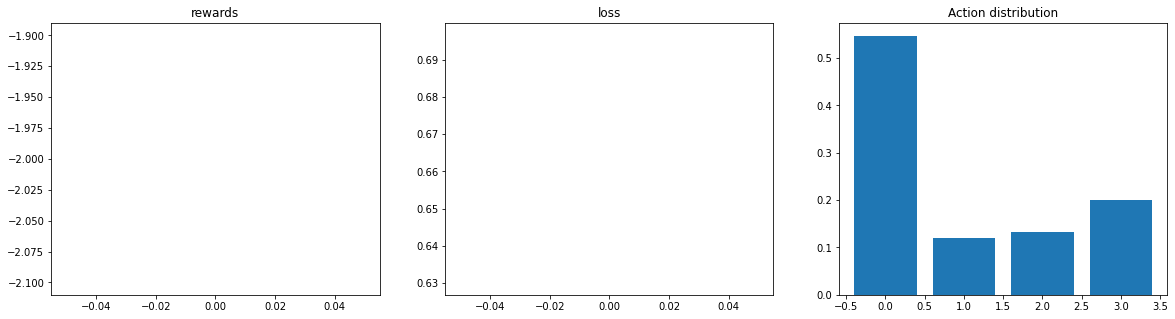

Episode: 0 - Averaged Score of the last 100 episodes : -2.0


In [ ]:
from agent import DqnAgent
from unityagents import UnityEnvironment
import numpy as np
import torch


dqn_params = {
    # Experiment hyperparameters
    'LR': 5e-4,               # learning rate
    
    'EPS': 1,                 # epsilon greedy start value
    'MIN_EPS': 0.01,          # epsilon greedy minimal
    'EPS_DECAY': 0.995,

    'ALPHA': 0.2,             # Alpha TD-error
    'GAMMA': 0.98,            # Gamma Td-error
    'TAU': 1e-3,              # for soft update of target parameters

    'UPDATE_EVERY': 4,        # Update fixed target model 

    'BUFFER_SIZE': int(1e4),  # Memmory max size
    'BATCH_SIZE': 64,         # Number of episode from which fixed target model learn from at each step
}


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

update_every = 100
max_time_per_episode = 1000

env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]

agent = DqnAgent(state_size=len(state), action_size=action_size, params=dqn_params, model='ddqn')

scores = []
loses = []
action_takens = []

for episode in range(3000):
    score = 0
    loss = 0
    action_taken = []

    env_info = env.reset(train_mode=True)[brain_name]
    action_size = brain.vector_action_space_size
    state = env_info.vector_observations[0]

    for max_t in range(max_time_per_episode):
        action = agent.act(state)                     # ask agent action selection
        env_info = env.step(action)[brain_name]                # send the action to the environment

        next_state = env_info.vector_observations[0]           # get the next state
        reward = env_info.rewards[0]                           # get the reward
        done = env_info.local_done[0]                          # see if episode has finished
        
        transition_info = (state, action, reward, next_state, done)
        loss += agent.step(transition_info)

        score += reward
        action_taken.append(action)

        if done:
            scores.append(score)
            loses.append(loss)
            action_takens += action_taken
            break

        state = next_state

    if episode % update_every == 0:
        plot(scores, loses, action_takens)
        print('Episode: {} - '.format(episode), end="")
        print('Averaged Score of the last {} episodes : {}'.format(update_every, np.mean(scores[-update_every:]).round(2)))
        torch.save(agent.local.state_dict(), 'checkpoint.pth')

env.close()